### Code to Create a ANN

In [1]:
%cd '/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle/'
%pwd

/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle


'/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle'

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import tensorflow as tf

# Lecture des donnees PTB.csv
ptb_abnormal = pd.read_csv('./ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('./ptbdb_normal.csv', header=None)

# Concatenation des deux DataFrames
ptb = pd.concat([ptb_normal, ptb_abnormal], ignore_index=True, sort=False)
ptb.rename(columns={187 :'class'}, inplace=True)

# Lecture des donnees MIT.csv
mit_train = pd.read_csv('./mitbih_train.csv', header=None)
mit_test = pd.read_csv('./mitbih_test.csv', header=None)

# Concatenation des deux DataFrames
mit = pd.concat([mit_train, mit_test], ignore_index=True, sort=False)
mit.rename(columns={187 :'class'}, inplace=True)

# Groupement des classes non-normal (1,2,3,4) en une seule classe Anormal (label=1)
mit['class'].replace({2:1,3:1,4:1}, inplace=True)

# Concatenation des jeux de donnees PTB et MIT  
data = pd.concat([ptb, mit], ignore_index=True, sort=False)

y = data['class'].copy()
X = data.drop('class', axis=1).copy()

X_train90, X_valid, y_train90, y_valid = train_test_split(X, y, train_size=0.9, random_state=1,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train90, y_train90, train_size=0.8, random_state=1,shuffle=True)
print('X_train.shape=',X_train.shape)
print('X_test.shape=',X_test.shape)
print('X_valid.shape=',X_valid.shape)


X_train.shape= (89278, 187)
X_test.shape= (22320, 187)
X_valid.shape= (12400, 187)


### import  

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical 

from time import time
from joblib import dump, load

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report

import itertools
import tensorflow as tf

print('X_train.shape=',X_train.shape)
print('X_test.shape=',X_test.shape)
print('X_valid.shape=',X_valid.shape)

print('y_train.shape=',y_train.shape)
y_train_cat = to_categorical(y_train, dtype='int')
print('y_train_cat.shape=',y_train_cat.shape)

2023-05-04 22:44:47.023301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train.shape= (89278, 187)
X_test.shape= (22320, 187)
X_valid.shape= (12400, 187)
y_train.shape= (89278,)
y_train_cat.shape= (89278, 2)


### ANN Model creation 

In [22]:
inputs = tf.keras.Input(
    shape=X_train.shape[1],
    batch_size=None,
    name='inputs',
    dtype=None,
    sparse=None,
    tensor=None,
    ragged=None,
    type_spec=None)

ACTIVATION = 'relu'
layer2 = True
layer3 = True

dense_layer1 = tf.keras.layers.Dense(
    units = 200,
    name='dense_layer1_' + ACTIVATION,
    activation=ACTIVATION,
    use_bias=True,
    kernel_initializer="normal",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None)

if Layer2 == True:
    dense_layer2 = tf.keras.layers.Dense(
        units = 100,
        name='dense_layer2_' + ACTIVATION,
        activation= ACTIVATION,
        use_bias=True,
        kernel_initializer="normal",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None)

    if layer3 == True:
        dense_layer3 = tf.keras.layers.Dense(
            units = 20,
            name='dense_layer3_' + ACTIVATION,
            activation= ACTIVATION,
            use_bias=True,
            kernel_initializer="normal",
            bias_initializer="zeros",
            kernel_regularizer=None,
            bias_regularizer=None,
            activity_regularizer=None,
            kernel_constraint=None,
            bias_constraint=None)

dense_output = tf.keras.layers.Dense(
    units = 2,
    name='dense_output_softmax',
    activation='softmax',
    use_bias=True,
    kernel_initializer="normal",
    bias_initializer="zeros")

x=dense_layer1(inputs)
if layer2==1: 
    x=dense_layer2(x)
    if layer3==1: 
        x=dense_layer3(x)
outputs = dense_output(x)

model = Model(inputs = inputs, outputs =outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 187)]             0         
                                                                 
 dense_layer1_relu (Dense)   (None, 200)               37600     
                                                                 
 dense_layer2_relu (Dense)   (None, 100)               20100     
                                                                 
 dense_layer3_relu (Dense)   (None, 20)                2020      
                                                                 
 dense_output_softmax (Dense  (None, 2)                42        
 )                                                               
                                                                 
Total params: 59,762
Trainable params: 59,762
Non-trainable params: 0
_______________________________________________________

## ANN Compilation, Training and Saving 

In [23]:
model.compile(loss= 'BinaryCrossentropy', optimizer= 'adam', metrics=['accuracy'])

epoch = 200*100 ; print('epoch=', epoch)
batch_size = 10000; print('batch_size=',batch_size)

t0 = time()
train_history = model.fit(X_train, 
                          y_train_cat, 
                          batch_size=batch_size, 
                          epochs=epoch, 
                          validation_split =0.2, 
                          callbacks = tf.keras.callbacks.EarlyStopping(patience=20))
t1 = time() - t0
print("===== Réalisé en {} secondes ======".format(round(t1,3)))

param_dense1 = {'units':dense_layer1.units,
    'name':dense_layer1.name,
    'activation':str(dense_layer1.activation).split(' ')[1],
    'use_bias':dense_layer1.use_bias,
    'kernel_initializer':dense_layer1.kernel_initializer,
    'bias_initializer':dense_layer1.bias_initializer}

params = {'Layer1':param_dense1, 'batch_size':batch_size, 'train_time':round(t1,3)}
paramL1Name = str(params['Layer1']['units'])+ 'u_' +str(params['Layer1']['activation']) + '_'
paramName = 'L1_' + paramL1Name; 

if layer2==True:
    param_dense2 = {'units':dense_layer2.units,
        'name':dense_layer2.name,
        'activation':str(dense_layer2.activation).split(' ')[1],
        'use_bias':dense_layer2.use_bias,
        'kernel_initializer':dense_layer2.kernel_initializer,
        'bias_initializer':dense_layer2.bias_initializer}
    params = {'Layer1':param_dense1, 'Layer2':param_dense2, 'batch_size':batch_size, 'train_time':round(t1,3)}
    paramL2Name = str(params['Layer2']['units'])
    paramName = 'L2_' + paramL2Name +  'L1_' + paramL1Name
    if layer3==True:
        paramName = 'L3_L2_' + paramL2Name +  'L1_' + paramL1Name


SaveFileName = 'ANN_' + paramName + str(batch_size) + 'batch_' + str(epoch)+ 'epoch.joblib'

dump([model, params, train_history],SaveFileName)
print('batch_size=',batch_size)
print('Model saved as ', SaveFileName)

epoch= 20000
batch_size= 10000
Epoch 1/20000
8/8 [==============================] - 2s 163ms/step - loss: 0.6860 - accuracy: 0.7168 - val_loss: 0.6683 - val_accuracy: 0.7609
Epoch 2/20000
8/8 [==============================] - 0s 38ms/step - loss: 0.6479 - accuracy: 0.7643 - val_loss: 0.6178 - val_accuracy: 0.7609
Epoch 3/20000
8/8 [==============================] - 0s 40ms/step - loss: 0.6159 - accuracy: 0.7643 - val_loss: 0.6077 - val_accuracy: 0.7609
Epoch 4/20000
8/8 [==============================] - 0s 40ms/step - loss: 0.5991 - accuracy: 0.7643 - val_loss: 0.5909 - val_accuracy: 0.7609
Epoch 5/20000
8/8 [==============================] - 0s 38ms/step - loss: 0.5807 - accuracy: 0.7643 - val_loss: 0.5637 - val_accuracy: 0.7609
Epoch 6/20000
8/8 [==============================] - 0s 39ms/step - loss: 0.5466 - accuracy: 0.7643 - val_loss: 0.5187 - val_accuracy: 0.7609
Epoch 7/20000
8/8 [==============================] - 0s 38ms/step - loss: 0.4990 - accuracy: 0.7643 - val_loss: 0.47

8/8 [==============================] - 0s 38ms/step - loss: 0.1024 - accuracy: 0.9658 - val_loss: 0.1395 - val_accuracy: 0.9527
Epoch 116/20000
8/8 [==============================] - 0s 36ms/step - loss: 0.1028 - accuracy: 0.9658 - val_loss: 0.1395 - val_accuracy: 0.9529
Epoch 117/20000
8/8 [==============================] - 0s 37ms/step - loss: 0.1015 - accuracy: 0.9656 - val_loss: 0.1395 - val_accuracy: 0.9528
Epoch 118/20000
8/8 [==============================] - 0s 37ms/step - loss: 0.1023 - accuracy: 0.9658 - val_loss: 0.1423 - val_accuracy: 0.9512
Epoch 119/20000
8/8 [==============================] - 0s 39ms/step - loss: 0.1028 - accuracy: 0.9649 - val_loss: 0.1398 - val_accuracy: 0.9518
Epoch 120/20000
8/8 [==============================] - 0s 37ms/step - loss: 0.1032 - accuracy: 0.9649 - val_loss: 0.1415 - val_accuracy: 0.9522
Epoch 121/20000
8/8 [==============================] - 0s 35ms/step - loss: 0.1027 - accuracy: 0.9651 - val_loss: 0.1385 - val_accuracy: 0.9532
Epoch 12

In [24]:
print(model.summary())
y_pred_cat = model.predict(X_test)
y_pred = y_pred_cat.argmax(axis=1)
print(classification_report(y_test, y_pred))


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 187)]             0         
                                                                 
 dense_layer1_relu (Dense)   (None, 200)               37600     
                                                                 
 dense_layer2_relu (Dense)   (None, 100)               20100     
                                                                 
 dense_layer3_relu (Dense)   (None, 20)                2020      
                                                                 
 dense_output_softmax (Dense  (None, 2)                42        
 )                                                               
                                                                 
Total params: 59,762
Trainable params: 59,762
Non-trainable params: 0
_______________________________________________________

Text(0.5, 1.0, '200units  relu  train time =47s')

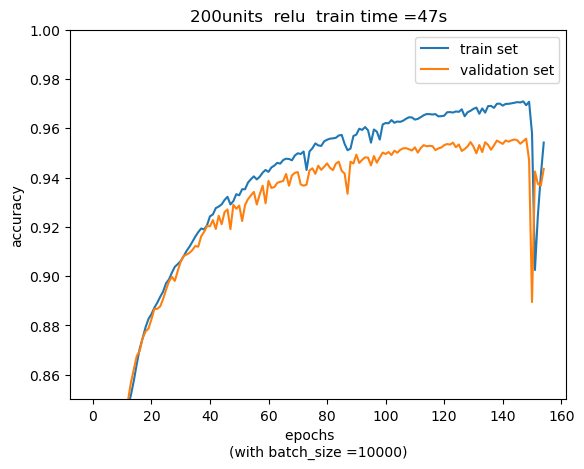

In [25]:
train_set =train_history.history['accuracy']
val_set =train_history.history['val_accuracy']

plt.plot(train_set,label = 'train set');
plt.plot(val_set, label= 'validation set');
plt.ylabel('accuracy')
plt.xlabel('epochs    \n(with batch_size ='+  str(params['batch_size'])  +')')
plt.legend();
plt.ylim([0.85,1])
plt.title( str(params['Layer1']['units']) + 'units  ' + params['Layer1']['activation'] + '  train time =' + str(int(params['train_time'])) +  's')
